[教程](https://space.bilibili.com/49109393/channel/detail?cid=36482)
# 导入数据
* 测试集
* 数据集

In [ ]:
import h5py

In [2]:
train_data = h5py.File('E:/Dowonload/datasets/train_catvnoncat.h5','r')
test_data = h5py.File('E:/Dowonload/datasets/test_catvnoncat.h5','r')

In [3]:
for key in train_data.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [4]:
train_data['train_set_x'].shape

(209, 64, 64, 3)

In [5]:
for key in test_data.keys():
    print(key)

list_classes
test_set_x
test_set_y


In [6]:
test_data['test_set_x'].shape

(50, 64, 64, 3)

# 取出训练集&测试集

In [7]:
train_data_org=train_data['train_set_x'][:]
train_labels_org=train_data['train_set_y'][:]
test_data_org=test_data['test_set_x'][:]
test_labels_org=test_data['test_set_y'][:]

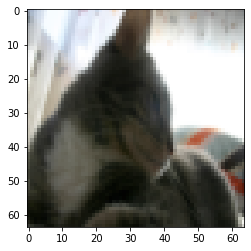

In [8]:
# 查看图片
import matplotlib.pyplot as plt
# 在线显示图片
%matplotlib inline
plt.imshow(train_data_org[149])

# 输入x为n*m的向量，n为特征数，m为样本数

In [9]:
# 数据维度的处理
m_train=train_data_org.shape[0]
m_test=test_data_org.shape[0]
train_data_trans=train_data_org.reshape(m_train,-1).T
test_data_trans=test_data_org.reshape(m_test,-1).T

In [10]:
print(train_data_trans.shape,test_data_trans.shape)

(12288, 209) (12288, 50)


In [11]:
import numpy as np
# 将label由50行转化为一行50列 
train_labels_trans=train_labels_org[np.newaxis,:]
test_labels_trans=test_labels_org[np.newaxis,:]

In [12]:
print(train_labels_trans.shape,test_labels_trans.shape)

(1, 209) (1, 50)


In [13]:
# 标准化至[0,1]
train_data_sta=train_data_trans/255
test_data_sta=test_data_trans/255

In [14]:
print(train_data_sta)

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]


# 定义相关函数
1. 激活函数
1. 初始化参数
1. 前向传播
1. 代价函数
1. 梯度下降（反向传播）
1. 预测函数

In [15]:
# 定义sigmoid函数
def sigmoid(z):
    a=1/(1+np.exp(-z))
    return a

In [16]:
# 初始化参数W，b
n_dim=train_data_sta.shape[0]
w=np.zeros((n_dim,1))
b=0

In [17]:
# 定义前向传播函数、代价函数、梯度下降
def propagate(w,b,X,y):
    
    #1.前向传播函数
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    
    #2.代价函数
    m=X.shape[1]
    J=-1/m*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    
    #3.梯度下降
    dw=1/m*np.dot(X,(A-y).T)
    db=1/m*np.sum(A-y)
    
    grands={'dw':dw,'db':db}
    
    return grands,J

In [18]:
# 优化部分
def optimize(w,b,X,y,alpha,n_iters):
    costs=[]
    for i in range(n_iters):
        grands,J=propagate(w,b,X,y)
        dw=grands['dw']
        db=grands['db']
        
        w=w-alpha*dw
        b=b-alpha*db
        
        if i%100==0:
            costs.append(J)
            print('n_iters is ',i,'cost is',J)
    grands={'dw':dw,'db':db}
    params={'w':w,'b':b}
    
    return grands,params,costs
        

In [19]:
# 预测部分
def predict(w,b,X_test):
    Z=np.dot(w.T,X_test)+b
    A=sigmoid(Z)
    
    m=X_test.shape[1]
    y_pred=np.zeros((1,m))
    
    for i in range(m):
        if A[:,i]>0.5:
            y_pred[:,i]=1
        else:
            y_pred[:,i]=0
    return y_pred
        

In [20]:
# 模型的整合
def model(w,b,X_train,y_train,X_test,y_test,alpha,n_iters):
    grands,params,costs=optimize(w,b,X_train,y_train,alpha,n_iters)
    w=params['w']
    b=params['b']
    
    y_pred_train=predict(w,b,X_train)
    y_pred_test=predict(w,b,X_test)
    
    print('the trian accuracy is',np.mean(y_pred_train==y_train)*100,'%')
    print('the test accuracy is',np.mean(y_pred_test==y_test)*100,'%')
    
    b={'w':w,
       'b':b,
       'costs':costs,
       'y_pred_train':y_pred_train,
       'y_pred_test':y_pred_test,
       'alpha':alpha}
    
    return b

# 模型训练和测试

In [21]:
b=model(w,b,train_data_sta,train_labels_trans,test_data_sta,test_labels_trans,alpha=0.05,n_iters=2000)

n_iters is  0 cost is 0.6931471805599453


D:\Program Files\Anaconda\envs\tensor\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Program Files\Anaconda\envs\tensor\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


n_iters is  100 cost is 1.0252720971937748
n_iters is  200 cost is 9.92345984414502
n_iters is  300 cost is nan
n_iters is  400 cost is 0.2778850304785309
n_iters is  500 cost is 0.10055739711388241
n_iters is  600 cost is 0.06701394442696157
n_iters is  700 cost is 3.646259750887257
n_iters is  800 cost is 0.11676540000417003
n_iters is  900 cost is 0.02720688284209392
n_iters is  1000 cost is 0.015438548331158602
n_iters is  1100 cost is 0.01081947052212422
n_iters is  1200 cost is 0.008475667017589736
n_iters is  1300 cost is 0.007068470706605519
n_iters is  1400 cost is 0.006127223986308473
n_iters is  1500 cost is 0.005450643271626486
n_iters is  1600 cost is 0.00493906401598462
n_iters is  1700 cost is 0.004537546841896249
n_iters is  1800 cost is 0.004213266548043793
n_iters is  1900 cost is 0.003945346464439003
the trian accuracy is 100.0 %
the test accuracy is 66.0 %


Text(0, 0.5, 'cost')

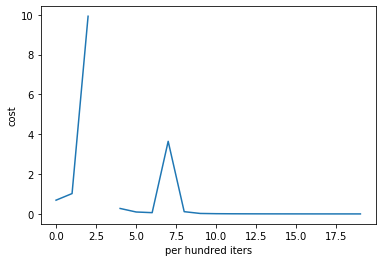

In [22]:
plt.plot(b['costs'])
plt.xlabel('per hundred iters')
plt.ylabel('cost')

In [25]:
index = 1
print('y is ',test_labels_trans[0,index])
print('y_predication is ',int(b['y_pred_test'][0,index]))

y is  1
y_predication is  1


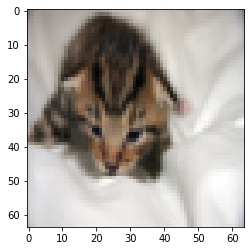

In [26]:
plt.imshow(test_data_org[index])